In [66]:
import math
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

eps = 1e-6


# 1. GD cho hàm 1 biến
* $f(x) = \frac{1}{2} (x - 1)^{2} - 2$
* $f'(x) = x - 1$

In [67]:
def grad1(x):
    return x - 1

def cost1(x):
    return 0.5*(x - 1)**2 - 2

def my_gd1(eta, x0, max_iter = 1000):
    x = [x0]
    for it in range(1000):
        x_old = x[-1]
        x_new = x_old - eta * grad1(x_old)
        x.append(x_new)

        if abs(x_new - x_old) < eps:
            return x, it + 1
    return x, max_iter

(x1, it1) = my_gd1(0.1, 0)
print(f"x* = {x1[-1]:.6f}, f(x*) = {cost1(x1[-1]):.6f}, obtained after {it1} iterations")

x* = 0.999992, f(x*) = -2.000000, obtained after 111 iterations


# 2. GD cho hàm nhiều biến:
* $\mathcal{L}(\mathbf{w}) = \frac{1}{2N}||\mathbf{y} - \bar{\mathbf{X}}\mathbf{w}||_2^2$
* $\nabla_{\mathbf{w}}\mathcal{L}(\mathbf{w}) = \frac{1}{N}\bar{\mathbf{X}}^T(\bar{\mathbf{X}}\mathbf{w} - \mathbf{y})$

### Tìm nghiệm tối ưu sử dụng GD


In [68]:
X = np.random.rand(1000, 1)
y = 4 + 3 * X + .2*np.random.randn(1000, 1) # noise added

one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X), axis = 1)

def grad2(w):
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y)

def cost2(w):
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w), 2)**2

def my_gd2(w_init, grad, eta, max_iter = 1000):
    w = [w_init]
    for it in range(max_iter):
        w_new = w[-1] - eta*grad2(w[-1])
        w.append(w_new)

        if np.linalg.norm(grad2(w_new))/len(w_new) < eps:
            return w, it + 1

    return w, max_iter

(w2, it2) = my_gd2(np.array([[2], [1]]), grad2, 1)
print(f"w* = {w2[-1].T}, obtained after {it1} iterations")

w* = [[4.03496918 2.96901801]], obtained after 111 iterations


### Đối chiếu với nghiệm tối ưu sử dụng công thức
* $\mathbf{w} = \mathbf{A}^{-1}\mathbf{b} = (\bar{\mathbf{X}}^T\bar{\mathbf{X}})^{-1}\bar{\mathbf{X}}^T\mathbf{y}$

In [69]:
A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)
w_lr = np.dot(np.linalg.pinv(A), b)
print('Solution found by formula: w* = ',w_lr.T)

Solution found by formula: w* =  [[4.03495605 2.96904297]]


# 3. GD + momentum
* $f(x) = x^2 + 10sin(x)$
* $f'(x) = 2x + 10cos(x)$

In [70]:
def grad_momentum(theta):
    return 2*theta + 10*np.cos(theta)

def cost_momentum(theta):
    return theta**2 + 10*np.sin(theta)

def gd_momentum(theta_init, eta, gamma, max_iter=1000):
    theta = [float(theta_init)]
    v_old = 0.0
    for it in range(max_iter):
        v_new = gamma * v_old + eta * grad_momentum(theta[-1])
        theta_new = theta[-1] - v_new
        theta.append(theta_new)
        v_old = v_new

        if abs(grad_momentum(theta_new)) < eps:
            return theta, it + 1

    return theta, max_iter

x, it3 = gd_momentum(5, 0.1, 0)
print(f"GD without momentum: theta = {x[-1]:.6f}, obtained after {it3} iterations")

x_, it3_ = gd_momentum(5, 0.1, 0.9)
print(f"GD with momentum   :theta = {x_[-1]:.6f}, obtained after {it3_} iterations")

GD without momentum: theta = 3.837467, obtained after 9 iterations
GD with momentum   :theta = -1.306440, obtained after 231 iterations


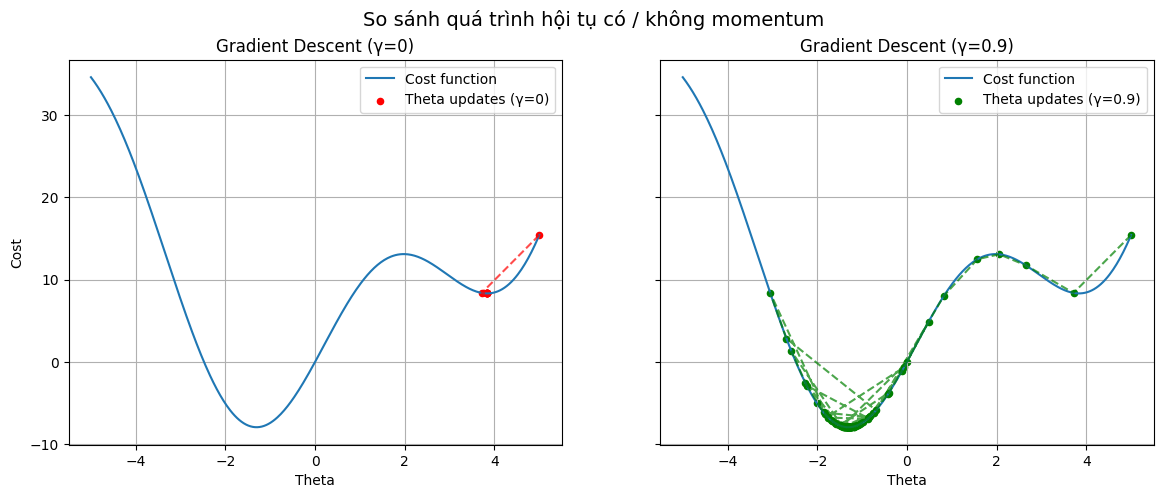

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14,5), sharey=True)

theta_vals = np.linspace(-5, 5, 400)
cost_vals = cost_momentum(theta_vals)

# Trường hợp không momentum
axes[0].plot(theta_vals, cost_vals, label='Cost function')
axes[0].scatter(x_hist, [cost_momentum(t) for t in x_hist], color='red', s=20, label='Theta updates (γ=0)')
axes[0].plot(x_hist, [cost_momentum(t) for t in x_hist], 'r--', alpha=0.7)
axes[0].set_title('Gradient Descent (γ=0)')
axes[0].set_xlabel('Theta')
axes[0].set_ylabel('Cost')
axes[0].grid(True)
axes[0].legend()

# Trường hợp có momentum
axes[1].plot(theta_vals, cost_vals, label='Cost function')
axes[1].scatter(x1_hist, [cost_momentum(t) for t in x1_hist], color='green', s=20, label='Theta updates (γ=0.9)')
axes[1].plot(x1_hist, [cost_momentum(t) for t in x1_hist], 'g--', alpha=0.7)
axes[1].set_title('Gradient Descent (γ=0.9)')
axes[1].set_xlabel('Theta')
axes[1].grid(True)
axes[1].legend()

plt.suptitle('So sánh quá trình hội tụ có / không momentum', fontsize=14)
plt.show()

# 4. GD + Nesterov accelerated gradient (NAG)